# CEH 10m Vs PDNP 12.5cm

#### Data

* 10 m Classified Pixel CEH (most detailed LC from CEH) **LCM_CEH_21**
10 m Classified Pixels have not been generalised by combination with the UKCEH Land Parcel Spatial Framework. This preserves intricate features of the landscape such as narrow linear features and small patches of habitat that fall below the 0.5 hectare minimum mappable unit (MMU) of the UKCEH Land Parcel Spatial Framework

* 12.5 cm Pixel PDNPA **LCM_PDNP_23**
Currently non dissolved data



In [31]:
# Import Libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
import numpy as np
from geocube.api.core import make_geocube
import pylandstats as pls
from rasterio.enums import MergeAlg

In [2]:
# Load the shp files (transfer to shapley later)
PDNP_23 = gpd.read_file("C:/Users/alexad/Desktop/lcm/pdnp_23_SK0857.shp") 
CEH_21 = gpd.read_file("C:/Users/alexad/Desktop/lcm/LCM_21_SK0857.shp") 

In [3]:
# create a dict of key
CEH_key = {1: 'Broadleaved woodland',
           2: 'Coniferous woodland',
           3: 'Arable and horticulture',
           4: 'Improved grassland',
           5: 'Neutral grassland',
           6: 'Calcareous grassland',
           7: 'Acid grassland',
           9: 'Fen, marsh and swamp',
           12: 'Inland rock',
           14: 'Fresh water',
           21: 'Suburban'
           }

In [4]:
# create a dict of key try to map to CEH
PDNP_key = {'Blanket Peat Grass Moor': 90,
           'Bracken': 91,
           'Broadleaved High Forest': 1,
           'Clear Felled/New Plantings in Forest Areas': 92,
           'Coniferous High Forest': 2,
           'Improved Pasture': 4,
           'Major Transport Routes': 21,
           'Open Water, Inland': 14,
           'Other Isolated Rural Developments (>0.25 ha)': 21,
           'Quarries and Mineral Workings': 21,
           'Rough Pasture': 5,
           'Scrub': 93,
           'Upland Heath': 94,
           'Upland Heath/Blanket Peat Mosaic': 95,
           'Urban': 21,
           'Wetland, Wet Grassland and Rush Pasture': 96
           } 

In [5]:
PDNP_23['code'] = PDNP_23['Class_name'].map(PDNP_key)
PDNP_23.head(2)

,lc_label,source,Class_name,Class_na_1,Shape_Leng,Shape_Area,geometry,code
0,E2a,model prediction,Improved Pasture,None,551.000039,0.303050,"MULTIPOLYGON (((408147.875 358000.000, 408004....",4
1,E2b,model prediction,Rough Pasture,None,1.500023,0.000825,"POLYGON ((408929.750 358000.000, 408929.125 35...",5


In [6]:
# map CEH code to name column
CEH_21['name'] = CEH_21['gridcode'].map(CEH_key)
# map PDNP name to code column
PDNP_23['code'] = PDNP_23['Class_name'].map(PDNP_key)

In [7]:
print(PDNP_23.Class_name.unique())

['Improved Pasture' 'Rough Pasture' 'Scrub' 'Broadleaved High Forest'
 'Coniferous High Forest' 'Upland Heath'
 'Wetland, Wet Grassland and Rush Pasture' 'Blanket Peat Grass Moor'
 'Upland Heath/Blanket Peat Mosaic'
 'Clear Felled/New Plantings in Forest Areas' 'Open Water, Inland'
 'Major Transport Routes' 'Quarries and Mineral Workings' 'Urban'
 'Other Isolated Rural Developments (>0.25 ha)' 'Bracken']


In [8]:
CEH_Palette = {'Broadleaved woodland' : 'forestgreen',
           'Coniferous woodland' : 'darkgreen',
           'Arable and horticulture' : 'peru',
           'Improved grassland' : 'lime',
           'Neutral grassland' : 'seagreen',
           'Calcareous grassland' : 'gold',
           'Acid grassland' : 'yellow',
           'Fen, marsh and swamp' : 'darkblue',
           'Inland rock' : 'grey',
           'Fresh water' : 'blue',
           'Suburban' : 'black'
           } 

In [9]:
PDNP_Palette = {'Blanket Peat Grass Moor' : 'forestgreen',
           'Bracken' : 'yellow',
           'Broadleaved High Forest' : 'forestgreen',
           'Clear Felled/New Plantings in Forest Areas' : 'grey',
           'Coniferous High Forest' : 'darkgreen',
           'Improved Pasture' : 'lime',
           'Major Transport Routes' : 'black',
           'Open Water, Inland' : 'blue',
           'Other Isolated Rural Developments (>0.25 ha)' : 'black',
           'Quarries and Mineral Workings' : 'black',
           'Rough Pasture' : 'seagreen',
           'Scrub' : 'turquoise',
           'Upland Heath' : 'purple',
           'Upland Heath/Blanket Peat Mosaic' : 'hotpink',
           'Urban' : 'black',
           'Wetland, Wet Grassland and Rush Pasture' : 'red'
           } 

C:\Users\alexad\AppData\Local\Temp\ipykernel_12148\3050492307.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  CEH_custom_patch = [Patch([0], [0], color=color) for color in CEH_Palette.values()]
C:\Users\alexad\AppData\Local\Temp\ipykernel_12148\3050492307.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  PDNP_custom_patch = [Patch([0], [0], color=color) for color in PDNP_Palette.values()]
c:\Users\alexad\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


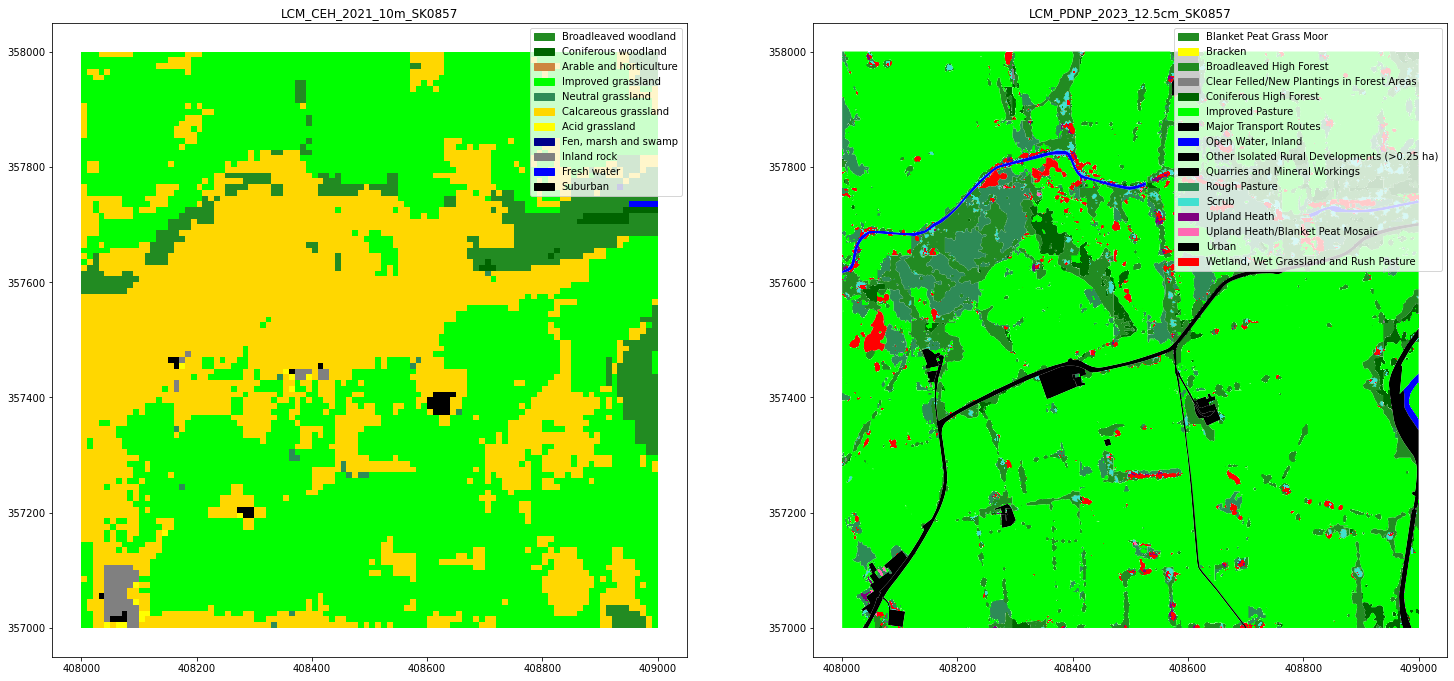

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

# add manual legend
CEH_custom_patch = [Patch([0], [0], color=color) for color in CEH_Palette.values()]
PDNP_custom_patch = [Patch([0], [0], color=color) for color in PDNP_Palette.values()]

CEH_21.plot('name', color=  CEH_21['name'].map(CEH_Palette), legend = True, ax=axes[0]);
PDNP_23.plot('Class_name', color = PDNP_23['Class_name'].map(PDNP_Palette), legend = True, ax=axes[1]);
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

ax=axes[0].legend(CEH_custom_patch, CEH_Palette.keys())
ax=axes[1].legend(PDNP_custom_patch, PDNP_Palette.keys())

# random AF wtf Legend placement doesn't work with custom colours :( 
    
# axes[0].legend(bbox_to_anchor=(1, 0.5))
# axes[1].legend(bbox_to_anchor=(1, 0.5))
# or
#CEH_21.plot('gridcode', color=  CEH_21['gridcode'].map(CEH_Palette), legend = True, ax=axes[0], legend_kwds={'bbox_to_anchor': (1, -0.05)});
#PDNP_23.plot('Class_name', color = PDNP_23['Class_name'].map(PDNP_Palette), legend = True, ax=axes[1], legend_kwds={'bbox_to_anchor': (1, -0.05)});


#### Isolate Broadleaved 

In [11]:
# subset the data
broadleaf_CEH = CEH_21[CEH_21['name'] == 'Broadleaved woodland']
broadleaf_PDNP = PDNP_23[PDNP_23['Class_name'] == 'Broadleaved High Forest']

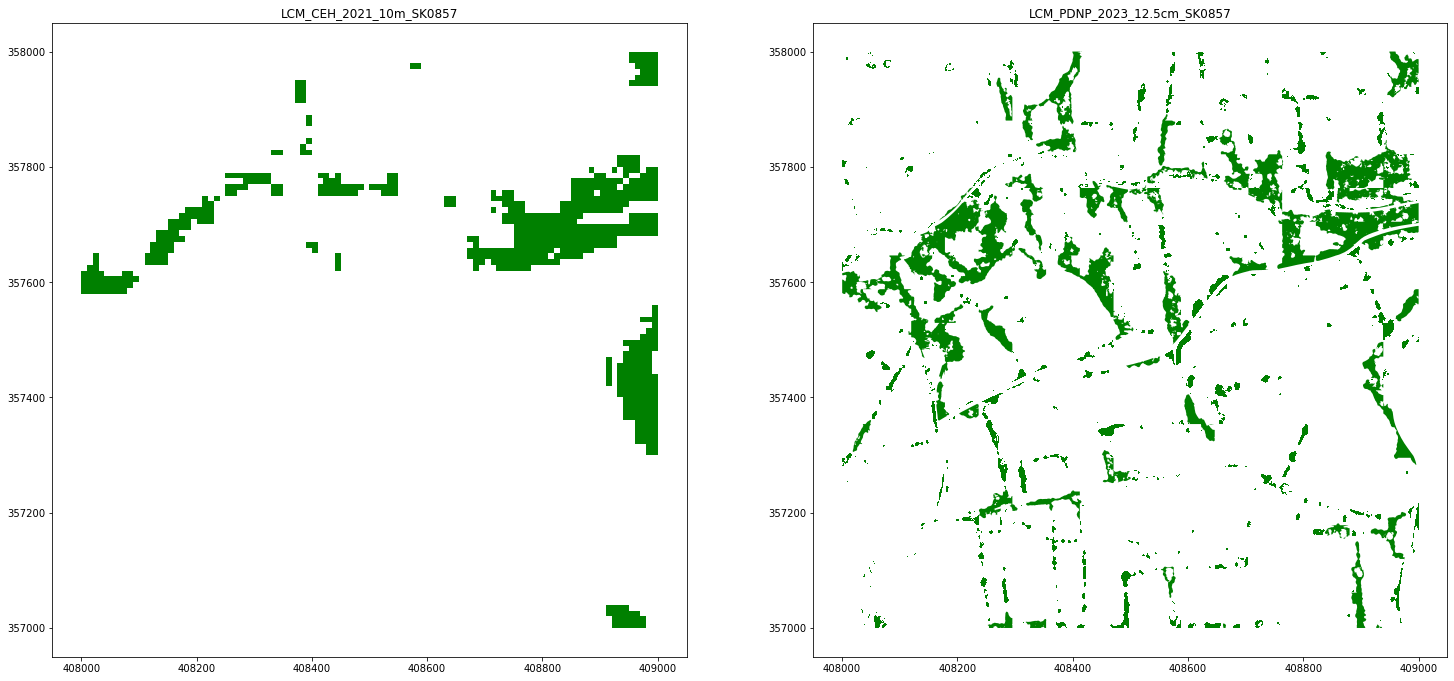

In [12]:
# plot woodland
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

broadleaf_CEH.plot('name', color= 'green', ax=axes[0])
broadleaf_PDNP.plot('Class_name', color = 'green', ax=axes[1])
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

##### Use vdplasthijs code here instead of pylandstats https://github.com/pdnpa/cnn-land-cover/blob/main/notebooks/Figure%20Rush%20pasture.ipynb

# Patch analysis

Need to covert to raster for pylandstats

In [13]:
# create the CEH raster
CEH_r = make_geocube(
    vector_data=CEH_21, 
    measurements=['gridcode'],
    resolution=(-10,10),
    fill=0)
    # save the tiff
CEH_r['gridcode'].rio.to_raster("C:/Users/alexad/Desktop/lcm/CEH.tif")

In [14]:
# create the PDNP raster
CEH_r = make_geocube(
    vector_data=PDNP_23, 
    measurements=['code'],
    resolution=(-1.25, 1.25),
    fill=0)
    # save the tiff
CEH_r['code'].rio.to_raster("C:/Users/alexad/Desktop/lcm/PDNP.tif")

In [15]:
CEH = pls.Landscape("C:/Users/alexad/Desktop/lcm/CEH.tif")
PDNP = pls.Landscape("C:/Users/alexad/Desktop/lcm/PDNP.tif")

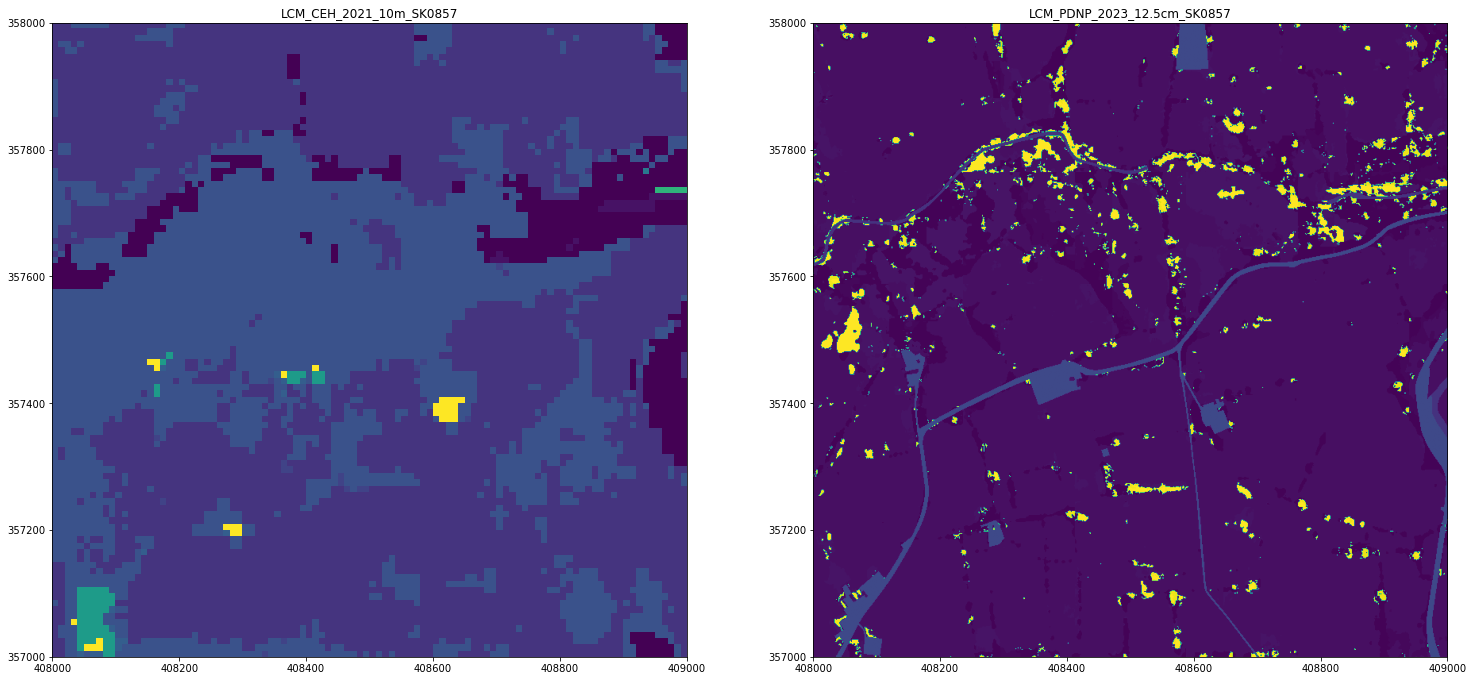

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

CEH.plot_landscape(ax=axes[0])
PDNP.plot_landscape(ax=axes[1])
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

#### Class metrics

In [59]:
# Compute pandas data frames of landscape metrics at the patch, class and landscape level
CEH_class_metrics_df = CEH.compute_class_metrics_df()
# map CEH code to name column
CEH_class_metrics_df['name'] = CEH_class_metrics_df.index.map(CEH_key)
CEH_class_metrics_df['location'] = 'CEH'

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 14.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 14.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anacond

In [18]:
# create a dict of key try to map to CEH
PDNP_key_ = {90: 'Blanket Peat Grass Moor',
           91: 'Bracken',
           1: 'Broadleaved High Forest',
           92: 'Clear Felled/New Plantings in Forest Areas',
           2: 'Coniferous High Forest',
           4: 'Improved Pasture',
           21: 'Major Transport Routes',
           14: 'Open Water, Inland',
           21: 'Other Isolated Rural Developments (>0.25 ha)',
           21: 'Quarries and Mineral Workings',
           5: 'Rough Pasture',
           93: 'Scrub',
           94: 'Upland Heath',
           95: 'Upland Heath/Blanket Peat Mosaic',
           21: 'Urban',
           96: 'Wetland, Wet Grassland and Rush Pasture'
           } 

In [71]:
# Compute pandas data frames of landscape metrics at the patch, class and landscape level
pdnp_class_metrics_df = PDNP.compute_class_metrics_df()
pdnp_class_metrics_df['name'] = pdnp_class_metrics_df.index.map(PDNP_key_)
pdnp_class_metrics_df['location'] = 'pdnp'

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anac

In [70]:
class_metrics = pd.concat([pdnp_class_metrics_df.loc[pdnp_class_metrics_df['name'] == 'Broadleaved High Forest'], 
CEH_class_metrics_df.loc[CEH_class_metrics_df['name'] == 'Broadleaved woodland']])
class_metrics.T

class_val,1.0,1.0
total_area,10.765469,6.44
proportion_of_landscape,10.766428,6.44
number_of_patches,582,19
patch_density,582.051839,19.0
largest_patch_index,1.181511,3.02
total_edge,41536.25,5350.0
edge_density,415.399497,53.5
landscape_shape_index,32.022857,5.764706
effective_mesh_size,0.043824,0.111056
area_mn,0.018497,0.338947


#### Patch level metrics

In [49]:
pdnp_patch_metrics_df = PDNP.compute_patch_metrics_df()
pdnp_patch_metrics_df['name'] = pdnp_patch_metrics_df['class_val'].map(PDNP_key_)
pdnp_patch_metrics_df['location'] = 'pdnp'

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(


In [21]:
val_count = pdnp_patch_metrics_df["name"].value_counts()
val_count

Wetland, Wet Grassland and Rush Pasture       686
Rough Pasture                                 677
Broadleaved High Forest                       582
Scrub                                         555
Improved Pasture                              254
Coniferous High Forest                        195
Upland Heath                                  166
Clear Felled/New Plantings in Forest Areas     33
Upland Heath/Blanket Peat Mosaic               26
Blanket Peat Grass Moor                        20
Urban                                           5
Open Water, Inland                              3
Bracken                                         1
Name: name, dtype: int64

<BarContainer object of 3203 artists>

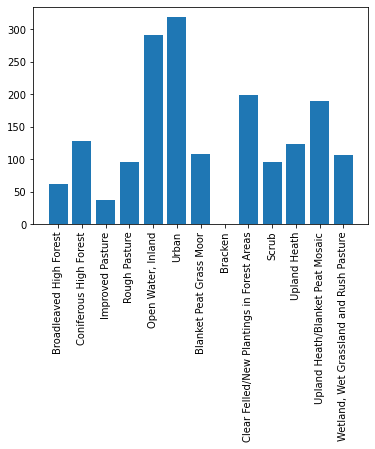

In [22]:
# plt euclidean_nearest_neighbor Distance to the nearest neighboring patch of the same class. Based on the shortest edge-to-edge Euclidean distance.
plt.xticks(rotation=90)
plt.bar(pdnp_patch_metrics_df['name'], pdnp_patch_metrics_df['euclidean_nearest_neighbor'])

In [52]:
# create CEH
CEH_patch_metrics_df = CEH.compute_patch_metrics_df()
CEH_patch_metrics_df['name'] = CEH_patch_metrics_df['class_val'].map(CEH_key)
CEH_patch_metrics_df['location'] = 'CEH'

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 14.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(


In [56]:
val_count = CEH_patch_metrics_df["name"].value_counts()
val_count

Calcareous grassland    76
Improved grassland      27
Broadleaved woodland    19
Neutral grassland       11
Acid grassland          11
Suburban                 7
Inland rock              5
Coniferous woodland      3
Fen, marsh and swamp     1
Fresh water              1
Name: name, dtype: int64

#### Landscape-level metrics

In [41]:
pdnp_landscape_metrics_df = PDNP.compute_landscape_metrics_df()
pdnp_landscape_metrics_df['location'] = 'pdnp'

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1261: RuntimeWarning: overflow encountered in long_scalars
  numerator *= 10000
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 91.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.p

In [42]:
CEH_landscape_metrics_df = CEH.compute_landscape_metrics_df()
CEH_landscape_metrics_df['location'] = 'CEH'

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 14.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 14.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1063: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anacond

In [44]:
landscape_metrics = pd.concat([pdnp_landscape_metrics_df, CEH_landscape_metrics_df])
landscape_metrics.T

,0,0
total_area,99.991094,100.0
number_of_patches,3203,161
patch_density,-1092.064558,161.0
largest_patch_index,20.123198,33.65
total_edge,82328.75,25260.0
edge_density,823.360831,252.6
landscape_shape_index,21.652188,7.315
effective_mesh_size,10.086144,22.760748
entropy,1.446588,1.384429
shannon_diversity_index,1.002699,0.959613
